In [28]:
import pandas as pd
pd.set_option('display.max_colwidth', -1)
import matplotlib.pyplot as plt

import nltk
import wordcloud

import functions as f # bespoke functions

In [4]:
questions = pd.read_csv('datafiles/questions.csv', encoding = 'iso-8859-1', index_col = 'Id')
questions.columns = [col.lower() for col in questions.columns]

answers = pd.read_csv('datafiles/answers.csv', encoding = 'iso-8859-1', index_col = 'Id')
answers.columns = [col.lower() for col in answers.columns]

In [5]:
questions.head(2)

,owneruserid,creationdate,score,title,body
Id,,,,,
469,147.0,2008-08-02T15:11:16Z,21,How can I find the full path to a font from its display name on a Mac?,"<p>I am using the Photoshop's javascript API to find the fonts in a given PSD.</p>\n\n<p>Given a font name returned by the API, I want to find the actual physical font file that that font name corresponds to on the disc.</p>\n\n<p>This is all happening in a python program running on OSX so I guess I'm looking for one of:</p>\n\n<ul>\n<li>Some Photoshop javascript</li>\n<li>A Python function</li>\n<li>An OSX API that I can call from python</li>\n</ul>\n"
502,147.0,2008-08-02T17:01:58Z,27,Get a preview JPEG of a PDF on Windows?,"<p>I have a cross-platform (Python) application which needs to generate a JPEG preview of the first page of a PDF.</p>\n\n<p>On the Mac I am spawning <a href=""http://developer.apple.com/documentation/Darwin/Reference/ManPages/man1/sips.1.html"">sips</a>. Is there something similarly simple I can do on Windows?</p>\n"


In [6]:
answers.head(2)

,owneruserid,creationdate,parentid,score,body
Id,,,,,
497,50.0,2008-08-02T16:56:53Z,469,4,<p>open up a terminal (Applications-&gt;Utilities-&gt;Terminal) and type this in:</p>\r\n\r\n<pre><code>locate InsertFontHere<br></code></pre>\r\n\r\n<p>This will spit out every file that has the name you want.</p>\r\n\r\n<p>Warning: there may be alot to wade through.</p>
518,153.0,2008-08-02T17:42:28Z,469,2,"<p>I haven't been able to find anything that does this directly. I think you'll have to iterate through the various font folders on the system: <code>/System/Library/Fonts</code>, <code>/Library/Fonts</code>, and there can probably be a user-level directory as well <code>~/Library/Fonts</code>.</p>\n"


In [5]:
answers.shape

(987122, 5)

In [6]:
# REDUCE SIZE
counts = f.find_number_answers(answers) # how many answers did each question get?

restricted = counts[counts['number_answers'] > 1] # which questions only evoked one answer?
answers = answers[answers['parentid'].isin(restricted.index)] # delete those answers
questions = questions[questions.index.isin(restricted.index)] # delete those questions

In [7]:
real_words = set(nltk.corpus.words.words())

In [9]:
# REMOVE HTML
no_html = [result for result in answers['body'].apply(f.remove_html)]
answers['body'] = no_html
answers.to_csv('datafiles/no_html_answers.csv')

no_html = [result for result in questions['body'].apply(f.remove_html)]
questions['body'] = no_html
questions.to_csv('datafiles/no_html_questions.csv')

In [2]:
questions = pd.read_csv('datafiles/no_html_questions.csv', index_col = 'Id')
answers = pd.read_csv('datafiles/no_html_answers.csv', index_col = 'Id')

In [6]:
# REMOVE STOPWORDS
no_stopwords = [result for result in answers['body'].apply(f.remove_stopwords)]
answers['body'] = no_stopwords
answers.to_csv('datafiles/no_stopwords_answers.csv')

In [7]:
# REMOVE STOPWORDS
no_stopwords = [result for result in questions['body'].apply(f.remove_stopwords)]
questions['body'] = no_stopwords
questions.to_csv('datafiles/no_stopwords_questions.csv')

In [ ]:
uestions = pd.read_csv('datafiles/no_stopwords_questions.csv', index_col = 'Id')
answers = pd.read_csv('datafiles/no_stopwords_answers.csv', index_col = 'Id')

In [26]:
# WORDCLOUD
cloud = wordcloud.WordCloud(width = 1000, height = 500)

In [9]:
textlist = [answer for answer in answers['body']]
text = "".join(str(answer)+" " for answer in textlist)

In [29]:
plt.figure(figsize=(15,10))
cloud.generate_from_text(text)

<Figure size 1080x720 with 0 Axes>

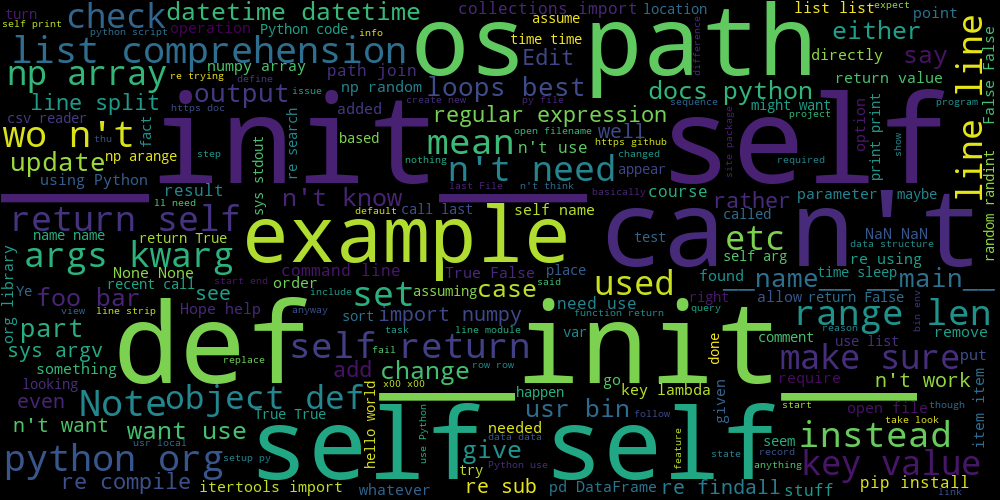

In [30]:
cloud.to_image()

In [ ]:
# this obviously needs work (self is duplicated), but the beginnings of something cool are there (why is __init__ so popular - 
# do people talk about classes much on stack overflow?